**Name: Prithvi Vadlamani**

**CWID: 10476457**



In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [34]:
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

In [35]:
np.random.seed(1234)

In [59]:
path_to_dataset = 'VIX_2000_Present.csv'
sequence_length = 20

In [60]:
vector_vix = []
with open(path_to_dataset) as f:
    next(f) 
    for line in f:
        fields = line.split(',')
        vector_vix.append(float(fields[5]))

In [38]:
matrix_vix = convertSeriesToMatrix(vector_vix, sequence_length)

In [39]:
# shift data by mean
matrix_vix = np.array(matrix_vix)
shifted_value = matrix_vix.mean()
matrix_vix -= shifted_value
print("Data  shape: ", matrix_vix.shape)

Data  shape:  (5759, 20)


In [40]:
train_row = int(round(0.9 * matrix_vix.shape[0]))
train_set = matrix_vix[:train_row, :]

In [41]:
# shuffle the training set 
np.random.shuffle(train_set)
# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_vix[train_row:, :-1]
y_test = matrix_vix[train_row:, -1]

In [42]:
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [63]:
from keras.backend import tanh
# build the model
model = Sequential()
# layer 1: LSTM
model.add(LSTM(units=1, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.4))
# layer 2: LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.4))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(units=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

In [64]:
model.fit(X_train, y_train, batch_size=512, epochs=50, validation_split=0.05)


Epoch 1/50
10/10 [==============================] - 4s 76ms/step - loss: 76.4694 - val_loss: 42.3443
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 59.9383 - val_loss: 34.2797
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 51.9595 - val_loss: 31.2192
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 47.9986 - val_loss: 29.9955
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 46.3198 - val_loss: 29.0258
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 43.7925 - val_loss: 26.5912
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 41.7875 - val_loss: 24.8884
Epoch 8/50
10/10 [==============================] - 0s 9ms/step - loss: 40.6780 - val_loss: 25.9402
Epoch 9/50
10/10 [==============================] - 0s 10ms/step - loss: 39.1516 - val_loss: 23.3011
Epoch 10/50
10/10 [==============================] - 0s 9ms/step - loss: 38.4982 - val_loss: 23.3

In [65]:
test_mse = model.evaluate(X_test, y_test, verbose=1)
print('\nThe mean squared error (MSE) on the test data set is %.5f over %d test samples.' % (test_mse, len(y_test)))

18/18 [==============================] - 0s 3ms/step - loss: 13.7629

The mean squared error (MSE) on the test data set is 13.76285 over 576 test samples.


In [66]:
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

18/18 [==============================] - 1s 2ms/step


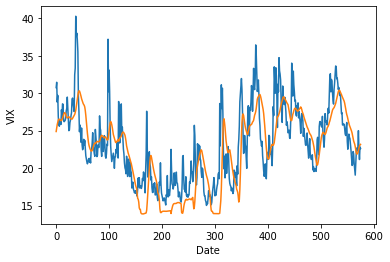

In [67]:
fig = plt.figure()
plt.plot(y_test + shifted_value)
plt.plot(predicted_values + shifted_value)
plt.xlabel('Date')
plt.ylabel('VIX')
plt.show()


In [68]:
fig.savefig('output_prediction.jpg', bbox_inches='tight')